<a href="https://colab.research.google.com/github/aarushiwagh/TBInterventionAnalysis/blob/main/TB_LRandPowerAnalysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


###Simulating Dataset and Outcomes

In [ ]:
index=np.arange(1, 1001)
age = np.random.randint(low=18, high=60, size=(1000))
gender=np.random.choice(2,1000,p=[0.5,0.5])
bmi=np.random.randint(0,3,1000)
education=np.random.choice(2,1000,p=[0.3,0.7])
smear_culture=np.random.choice(2,1000,p=[0.5,0.5])
xpert=np.random.choice(2,1000,p=[0.2,0.8])
clinical_tb=np.random.choice(2,1000,p=[0.8,0.2])
#alcohol=np.random.choice(2,1000,p=[0.6,0.4])

In [ ]:
gender[1]

1

In [ ]:
alcohol=[]

In [ ]:
for i in range(1000):
  if(gender[i]==0):
    alcohol.append(np.random.choice(2,1,p=[0.6,0.4])[0])
  else:
    alcohol.append(0)

In [ ]:
len(alcohol)

1000

In [ ]:
df=pd.DataFrame({'idx':index,'age':age,'Gender':gender,'bmi':bmi,'edu':education,'smear_culture':smear_culture,'xpert':xpert,'clin_tb':clinical_tb, 'alcoholic':alcohol})
df

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic
0,1,37,1,1,1,0,1,1,0
1,2,21,1,0,1,1,1,0,0
2,3,51,0,2,1,0,1,0,1
3,4,21,0,1,1,1,1,1,0
4,5,49,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
995,996,43,1,0,0,0,1,0,0
996,997,53,1,1,0,0,1,0,0
997,998,31,1,2,1,1,0,0,0
998,999,24,1,0,1,1,1,1,0


In [ ]:
test=np.random.choice(2,1,p=[0.5,0.5])
test

array([0])

In [ ]:
df['alcoholic'].value_counts()

0    809
1    191
Name: alcoholic, dtype: int64

In [ ]:
df.head()

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic
0,1,37,1,1,1,0,1,1,0
1,2,21,1,0,1,1,1,0,0
2,3,51,0,2,1,0,1,0,1
3,4,21,0,1,1,1,1,1,0
4,5,49,0,1,1,0,1,1,1


In [ ]:
intervention=[]


In [ ]:
treat_outcomeb4=[]

In [ ]:
treat_outcome_after=[]

In [ ]:
for i in range(1000):
  if(df['alcoholic'][i]==1):
    intervention.append(np.random.choice(2,1,p=[0.5,0.5])[0])
  else:
    intervention.append(np.nan)
df['intervention']=intervention

In [ ]:
df.head(20)

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic,intervention
0,1,37,1,1,1,0,1,1,0,NaN
1,2,21,1,0,1,1,1,0,0,NaN
2,3,51,0,2,1,0,1,0,1,1.0
3,4,21,0,1,1,1,1,1,0,NaN
4,5,49,0,1,1,0,1,1,1,1.0
5,6,33,1,2,1,1,1,0,0,NaN
6,7,43,1,0,1,1,1,0,0,NaN
7,8,38,1,1,1,1,1,0,0,NaN
8,9,52,0,2,0,1,1,1,0,NaN
9,10,56,1,2,1,0,1,1,0,NaN


In [ ]:
for i in range(1000):
  if(df['alcoholic'][i]==0):
    x = np.random.choice(2,1,p=[0.1,0.9])[0]
    treat_outcomeb4.append(x)
    treat_outcome_after.append(x)
  if(df['alcoholic'][i]==1):
      x = np.random.choice(2,1,p=[0.3,0.7])[0]#the ideal effect size should be such that these numbers reach the number for non-alcoholics
      treat_outcomeb4.append(x)
      if(df['intervention'][i]==0):
         treat_outcome_after.append(np.random.choice(2,1,p=[0.3,0.7])[0])
      elif(df['intervention'][i]==1):
         treat_outcome_after.append(np.random.choice(2,1,p=[0.15,0.85])[0])#[0] to convert the datatype from numpy nd array to numpy int 64


In [ ]:
type(np.random.choice(2,1,p=[0.20,0.80])[0])

numpy.int64

In [ ]:
df['intervention'].value_counts()

1.0    107
0.0     84
Name: intervention, dtype: int64

In [ ]:
df['Treatment Outcomes Before']=treat_outcomeb4
df['Treatment Outcomes After']=treat_outcome_after

In [ ]:
print(df['Treatment Outcomes Before'].value_counts())#80-20
print(df['Treatment Outcomes After'].value_counts())#85-15

1    860
0    140
Name: Treatment Outcomes Before, dtype: int64
1    871
0    129
Name: Treatment Outcomes After, dtype: int64


In [ ]:
x = np.random.choice(2,1,p=[0.5,0.5])
x.astype(int)
x[0]

1

In [ ]:
#df=df.drop(['Treatment Outcomes Before'],axis=1)
#df=df.drop(['Treatment Outcomes After'],axis=1)

In [ ]:
df.head(50)

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic,intervention,Treatment Outcomes Before,Treatment Outcomes After
0,1,37,1,1,1,0,1,1,0,NaN,1,1
1,2,21,1,0,1,1,1,0,0,NaN,1,1
2,3,51,0,2,1,0,1,0,1,1.0,1,0
3,4,21,0,1,1,1,1,1,0,NaN,1,1
4,5,49,0,1,1,0,1,1,1,1.0,0,1
5,6,33,1,2,1,1,1,0,0,NaN,1,1
6,7,43,1,0,1,1,1,0,0,NaN,1,1
7,8,38,1,1,1,1,1,0,0,NaN,1,1
8,9,52,0,2,0,1,1,1,0,NaN,0,0
9,10,56,1,2,1,0,1,1,0,NaN,1,1


In [ ]:
#molten=pd.melt(df,var_name='alcoholic',id_vars='idx')
#molten[molten.intervention==[0]]

In [ ]:
df['intervention']=df['intervention'].replace(0.0,2.0)

In [ ]:
df['intervention']=df['intervention'].fillna(0.0) #0 - non alcoholics, 1- alcoholics w intervention, 2- alcoholics w no intervention

In [ ]:
df.head(30)#final dataset used

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic,intervention,Treatment Outcomes Before,Treatment Outcomes After
0,1,37,1,1,1,0,1,1,0,0.0,1,1
1,2,21,1,0,1,1,1,0,0,0.0,1,1
2,3,51,0,2,1,0,1,0,1,1.0,1,0
3,4,21,0,1,1,1,1,1,0,0.0,1,1
4,5,49,0,1,1,0,1,1,1,1.0,0,1
5,6,33,1,2,1,1,1,0,0,0.0,1,1
6,7,43,1,0,1,1,1,0,0,0.0,1,1
7,8,38,1,1,1,1,1,0,0,0.0,1,1
8,9,52,0,2,0,1,1,1,0,0.0,0,0
9,10,56,1,2,1,0,1,1,0,0.0,1,1


In [ ]:
#df['intervention_alcohol']=df['intervention'].rename()

In [ ]:
#df.drop(columns='intervention_alcohol',inplace=True)

In [ ]:
df.rename(columns={'intervention':'intervention_alc'},inplace=True)

In [ ]:
depressed=np.random.choice(2,1000,p=[0.8,0.2])
depressed[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
df['depressed']=depressed

In [ ]:
df['depressed'].value_counts()

0    811
1    189
Name: depressed, dtype: int64

In [ ]:
intervention_dep=[]

In [ ]:
for i in range(1000):
  if(df['depressed'][i]==0):
    intervention_dep.append(np.nan)
  elif(df['depressed'][i]==1):
    intervention_dep.append(np.random.choice(2,1,p=[0.5,0.5])[0])  

In [ ]:
df['intervention_dep']=intervention_dep

In [ ]:
df['intervention_dep']=df['intervention_dep'].replace(0.0,2.0)

In [ ]:
df['intervention_dep']=df['intervention_dep'].fillna(0.0)

In [ ]:
df['intervention_dep'].value_counts()#0:People with no depression 1:depressed and recieved intervention 2:depressed and not recieved intervention

0.0    811
2.0     95
1.0     94
Name: intervention_dep, dtype: int64

In [ ]:
df.head(50)

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic,intervention_alc,Treatment Outcomes Before,Treatment Outcomes After,depressed,intervention_dep
0,1,37,1,1,1,0,1,1,0,0.0,1,1,0,0.0
1,2,21,1,0,1,1,1,0,0,0.0,1,1,0,0.0
2,3,51,0,2,1,0,1,0,1,1.0,1,0,1,1.0
3,4,21,0,1,1,1,1,1,0,0.0,1,1,1,2.0
4,5,49,0,1,1,0,1,1,1,1.0,0,1,0,0.0
5,6,33,1,2,1,1,1,0,0,0.0,1,1,0,0.0
6,7,43,1,0,1,1,1,0,0,0.0,1,1,0,0.0
7,8,38,1,1,1,1,1,0,0,0.0,1,1,0,0.0
8,9,52,0,2,0,1,1,1,0,0.0,0,0,0,0.0
9,10,56,1,2,1,0,1,1,0,0.0,1,1,1,2.0


In [ ]:
#df['intervention_alc']=df['intervention_alc'].astype(int)

In [ ]:
#df['intervention_dep']=df['intervention_dep'].astype(int)

 Cases:
#####1.No risk factors Treatment outcome probability 1:0.9 0:0.1
#####2.Alcohol+no intervention: 1:0.8 0:0.2
#####3.Alcohol+intervention: 1:0.85 0:0.15
#####4.Depression+ no intervention 1:0.8 0:0.2
#####5:Depression + intervention 1:0.85 0:0.15

#####6:Alcohol and Depression
#####1.w intervention for both: 1:0.85 0:0.15
#####2.w no intervention for both 1:0.70 0:0.30
#####3.intervention only for alcohol and not depression 1:0.75 0:0.25
#####4.intervention only for depression and not alcohol 1:0.75 0:0.25




In [ ]:
print(df['alcoholic'].value_counts())
print(df['depressed'].value_counts())


0    809
1    191
Name: alcoholic, dtype: int64
0    811
1    189
Name: depressed, dtype: int64


In [ ]:
print(df['intervention_alc'].value_counts())
print(df['intervention_dep'].value_counts())


0.0    809
1.0    107
2.0     84
Name: intervention_alc, dtype: int64
0.0    811
2.0     95
1.0     94
Name: intervention_dep, dtype: int64


In [ ]:
import math

In [ ]:
treatment_outcomes=[]

In [ ]:
df['intervention_alc']=df['intervention_alc'].apply(int)
df['intervention_dep']=df['intervention_dep'].apply(int)

In [ ]:
df['intervention_alc'][4]

1

In [ ]:
df['intervention_dep'][4]

0

In [ ]:
for i in range(1000):
    if(df['intervention_alc'][i]==0 and df['intervention_dep'][i]==0):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.1,0.9])[0])
    elif(df['intervention_alc'][i]==1 and df['intervention_dep'][i]==0):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.15,0.85])[0])
    elif(df['intervention_alc'][i]==2 and df['intervention_dep'][i]==0):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.20,0.80])[0])
    elif(df['intervention_alc'][i]==1 and df['intervention_dep'][i]==1):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.15,0.85])[0])
    elif(df['intervention_alc'][i]==2 and df['intervention_dep'][i]==1):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.25,0.75])[0])
    elif(df['intervention_alc'][i]==2 and df['intervention_dep'][i]==2):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.30,0.70])[0])
    elif(df['intervention_alc'][i]==1 and df['intervention_dep'][i]==2):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.25,0.75])[0])
    elif(df['intervention_alc'][i]==0 and df['intervention_dep'][i]==1):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.15,0.85])[0])
    elif(df['intervention_alc'][i]==0 and df['intervention_dep'][i]==2):
     treatment_outcomes.append(np.random.choice(2,1,p=[0.20,0.80])[0])
    #else:
      #treatment_outcomes.append(np.random.choice(2,1,p=[0.85,0.15]))
      #treatment_outcomes.append(2)

In [ ]:
len(treatment_outcomes)

1000

In [ ]:
df['treatment_outcomes']=treatment_outcomes

In [ ]:
df.drop(columns=['Treatment Outcomes Before','Treatment Outcomes After'],inplace=True)

In [ ]:
df.head()

,idx,age,Gender,bmi,edu,smear_culture,xpert,clin_tb,alcoholic,intervention_alc,depressed,intervention_dep,treatment_outcomes
0,1,37,1,1,1,0,1,1,0,0,0,0,1
1,2,21,1,0,1,1,1,0,0,0,0,0,1
2,3,51,0,2,1,0,1,0,1,1,1,1,1
3,4,21,0,1,1,1,1,1,0,0,1,2,1
4,5,49,0,1,1,0,1,1,1,1,0,0,1


In [ ]:
df['treatment_outcomes'].value_counts()

1    875
0    125
Name: treatment_outcomes, dtype: int64

In [ ]:
treat_outcomes_corr=[]

In [ ]:
len(treatment_outcomes)

1000

###Control and Treatment Datasets for Power Analysis
Treatment:Depressed Recieved Intervention Control:Depressed Not Recieved Intervention

In [ ]:
dep_intervention_locs=np.where(df['intervention_dep']==1.0)
dep_naintervention_locs=np.where(df['intervention_dep']==2.0)

In [ ]:
dep_intervention_locs,dep_naintervention_locs

((array([  2,  12,  13,  29,  52,  63,  74,  78,  82,  96, 110, 113, 114,
         121, 129, 135, 143, 147, 157, 159, 172, 175, 181, 182, 183, 194,
         202, 207, 210, 217, 259, 272, 276, 282, 284, 324, 332, 347, 355,
         358, 398, 403, 407, 408, 435, 465, 476, 488, 500, 507, 514, 523,
         526, 533, 536, 537, 544, 558, 569, 593, 594, 595, 600, 604, 620,
         634, 639, 660, 671, 677, 699, 704, 716, 717, 720, 739, 747, 760,
         788, 798, 807, 813, 820, 848, 865, 881, 889, 916, 931, 954, 957,
         964, 984, 997]),),
 (array([  3,   9,  25,  28,  45,  47,  60,  62,  73,  79,  80,  89,  90,
         107, 112, 120, 133, 152, 154, 188, 195, 197, 200, 215, 227, 263,
         274, 280, 285, 298, 303, 315, 326, 329, 333, 340, 373, 375, 394,
         401, 406, 414, 419, 431, 434, 453, 466, 512, 513, 517, 529, 538,
         553, 566, 585, 597, 602, 610, 611, 658, 659, 661, 663, 679, 686,
         688, 691, 693, 697, 731, 749, 767, 811, 816, 828, 832, 837, 852,
         8

In [ ]:
dep_intervention=[]
dep_nointervention=[]

In [ ]:
for i in dep_intervention_locs:
  dep_intervention.append(df['treatment_outcomes'].iloc[i])
for j in dep_naintervention_locs:
  dep_nointervention.append(df['treatment_outcomes'].iloc[j])

In [ ]:
l1 = len(dep_intervention[0])
l2 = len(dep_nointervention[0])
l1,l2

(94, 95)

In [ ]:
index_inter=np.arange(0,l1)
index_na_inter=np.arange(0,l2)

In [ ]:
dep_inter=pd.DataFrame({'idx':index_inter,"Dep:Intervened":dep_intervention[0]})
dep_na_inter=pd.DataFrame({'idx':index_na_inter,"Dep:Non Interevened Results":dep_nointervention[0]})

In [ ]:
mu1=dep_inter['Dep:Intervened'].mean()
mu2=dep_na_inter['Dep:Non Interevened Results'].mean()
mu1,mu2

(0.8404255319148937, 0.7894736842105263)

In [ ]:
std1=dep_inter['Dep:Intervened'].std()
std2=dep_na_inter['Dep:Non Interevened Results'].std()
std1,std2

(0.3681745579851539, 0.4098452443302374)

In [ ]:
from statsmodels.stats.power import TTestIndPower

In [ ]:
power_analysis=TTestIndPower()

In [ ]:
s = np.sqrt(((l1 - 1) * std1 + (l2 - 1) * std2) / (l1 + l2 - 2))
d = (mu1 - mu2) / s #cohen's effect size
effect = round(d,2)

In [ ]:
effect

0.08

###Obtaining Control and Treatment DataFrames for Power Analysis:1
Treatment:Alcoholics Recieved Intervention
Control:Alcoholics Not Recieved Intervention
Ratio approximated to 1

In [ ]:
npx1=df.loc[df['intervention']==1.0]

In [ ]:
np1=np.where(df['intervention']==1.0)
np2=np.where(df['intervention']==2.0)

In [ ]:
np1,np2

((array([  0,   3,  12,  19,  26,  33,  48,  62,  63,  66,  67,  69,  73,
          74,  86,  88,  93,  95, 105, 110, 114, 116, 119, 120, 121, 134,
         142, 143, 147, 152, 160, 161, 171, 174, 175, 177, 180, 183, 185,
         192, 201, 202, 205, 209, 216, 217, 218, 221, 223, 224, 228, 232,
         237, 251, 260, 261, 262, 263, 264, 268, 276, 282, 284, 287, 290,
         291, 297, 302, 313, 314, 322, 327, 340, 352, 354, 360, 361, 367,
         370, 376, 384, 385, 389, 390, 394, 395, 398, 399, 407, 411, 412,
         426, 427, 430, 432, 433, 434, 444, 448, 461, 463, 467, 470, 472,
         475, 479, 486, 495, 497, 501, 503, 506, 514, 515, 520, 525, 530,
         532, 536, 537, 540, 550, 552, 564, 568, 572, 578, 600, 604, 609,
         611, 612, 634, 636, 638, 639, 643, 647, 653, 659, 665, 666, 668,
         673, 677, 684, 693, 697, 703, 704, 705, 706, 709, 717, 723, 732,
         738, 739, 740, 742, 747, 749, 755, 756, 762, 769, 773, 775, 776,
         779, 783, 790, 792, 793, 797,

In [ ]:
intervention_array=[]
non_intervention_array=[]

In [ ]:
df['Treatment Outcomes After'][7]

1

In [ ]:
df['Treatment Outcomes After'].iloc[7]

1

In [ ]:
for i in np1:
  intervention_array.append(df['Treatment Outcomes After'].iloc[i])

for j in np2:
  non_intervention_array.append(df['Treatment Outcomes After'].iloc[j])

In [ ]:
intervention_array[0],non_intervention_array[0]

(0      1
 3      1
 12     1
 19     1
 26     1
       ..
 966    1
 974    1
 982    1
 992    1
 998    0
 Name: Treatment Outcomes After, Length: 217, dtype: int64, 10     1
 14     0
 17     0
 20     1
 21     1
       ..
 976    1
 978    1
 979    1
 983    1
 995    1
 Name: Treatment Outcomes After, Length: 197, dtype: int64)

In [ ]:
n1 = len(intervention_array[0])
n2 = len(non_intervention_array[0])
n1, n2

(217, 197)

In [ ]:
index2=np.arange(0,n1)
index3=np.arange(0,n2)

In [ ]:
df2=pd.DataFrame({'idx':index2,"Intervened":intervention_array[0]})
df3=pd.DataFrame({'idx':index3,"Non Interevened Results":non_intervention_array[0]})

In [ ]:
df2.describe

<bound method NDFrame.describe of      idx  Intervened
0      0           1
3      1           1
12     2           1
19     3           1
26     4           1
..   ...         ...
966  212           1
974  213           1
982  214           1
992  215           1
998  216           0

[217 rows x 2 columns]>

In [ ]:
df2.head()#a dataframe containing the treatment outcomes where intervention=1.0 i.e alcholism and intervention

,idx,Intervened
0,0,1
3,1,1
12,2,1
19,3,1
26,4,1


In [ ]:
mu1=df2['Intervened'].mean()
mu2=df3['Non Interevened Results'].mean()
mu1,mu2

(0.8755760368663594, 0.766497461928934)

In [ ]:
std1=df2['Intervened'].std()
std2=df3['Non Interevened Results'].std()
std1,std2

(0.33082775670776915, 0.4241370786351002)

In [ ]:
df3.head()

,idx,Non Interevened Results
10,0,1
14,1,0
17,2,0
20,3,1
21,4,1







###Power Analysis for above Treatment and Control Variables
####ideal values: effect size=0.15, power=0.8, alpha=0.05

In [ ]:
from statsmodels.stats.power import TTestIndPower

In [ ]:
#with ideal values
power_analysis=TTestIndPower()
sample_size=power_analysis.solve_power(effect_size=0.15,alpha=0.05,power=0.8,alternative='two-sided')#effect_size of 0.15 is ideally to be observed in the treatment outcomes of intervened and not intervened
sample_size

698.6381616833869

In [ ]:
power=power_analysis.power(effect_size=0.15,alpha=0.05,nobs1=698,ratio=0.95,alternative='two-sided')
power

0.7893468046408468

In [ ]:
#Calculating the effect size for the params of mean,std dev,sample size
#1:Treatment Group 2:Control Group
#n1=194
#n2=204
s = np.sqrt(((n1 - 1) * std1 + (n2 - 1) * std2) / (n1 + n2 - 2))
d = (mu1 - mu2) / s #cohen's effect size
effect = round(d,2)

In [ ]:
print ("Effect size is", round(d,2))

Effect size is 0.18


In [ ]:
power_analysis = TTestIndPower()
# Calculate power
alpha = power_analysis.solve_power(effect_size = 0.15, power = 0.8, nobs1 = 698, ratio = 1, alternative = 'two-sided')
# Print results
print('The significance level for the hypothesis testing is', round(alpha, 2))

The significance level for the hypothesis testing is 0.05


In [ ]:
#with our values
power1=power_analysis.power(effect_size=effect,alpha=0.05,nobs1=698,ratio=0.95,alternative='two-sided')
power_analysis=TTestIndPower()
sample_size1=power_analysis.solve_power(effect_size=effect,alpha=0.05,power=power1,alternative='two-sided')#effect_size of 0.15 is ideally to be observed in the treatment outcomes of intervened and not intervened
sample_size1

680.1031979418199

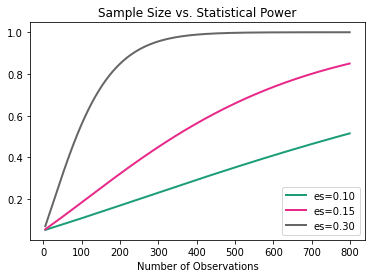

In [ ]:
power_analysis = TTestIndPower()
# Visualization
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 800),
                          effect_size=np.array([0.1, 0.15, 0.30]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()


###Obtaining DataFrames of Treatment and Control Variables for Power Analysis:2
Treatment:Recieved Interventions and Non-Alcholics
Control:Not Recieved Intervention

###Add Depression feature as a risk factor

In [ ]:
treatment2=np.where((df['intervention']==1.0) | (df['intervention']==0.0))
control2=np.where(df['intervention']==2.0)

In [ ]:
treatment2,control2

((array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
          15,  16,  18,  19,  22,  24,  25,  26,  27,  29,  30,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  47,  48,
          49,  50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  62,  63,
          64,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  95,  98,  99, 100, 101, 102, 104, 105, 107, 108, 109,
         110, 111, 112, 113, 114, 116, 118, 119, 120, 121, 124, 126, 127,
         128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142,
         143, 144, 145, 147, 149, 150, 151, 152, 154, 155, 156, 159, 160,
         161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174,
         175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
         189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202,
         203, 204, 205, 208, 209, 210,

In [ ]:
non_alcohol_arr=[]
alcohol_arr=[]

In [ ]:
for i in treatment2:
  non_alcohol_arr.append(df['Treatment Outcomes After'].iloc[i])

for j in control2:
  alcohol_arr.append(df['Treatment Outcomes After'].iloc[j])

In [ ]:
n3=len(non_alcohol_arr[0])
n3

803

In [ ]:
n4=len(alcohol_arr[0])
n4

197

In [ ]:
index4=np.arange(0,n3)
index5=np.arange(0,n4)

In [ ]:
df4=pd.DataFrame({'idx':index4,"Non Alcoholics+Intervened":non_alcohol_arr[0]})
df5=pd.DataFrame({'idx':index5,"Non Intervened":alcohol_arr[0]})

In [ ]:
df4.head(10)

,idx,Non Alcoholics+Intervened
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,0
9,9,0


In [ ]:
df5.head()

,idx,Non Intervened
10,0,1
14,1,0
17,2,0
20,3,1
21,4,1


In [ ]:
mu3=df4['Non Alcoholics+Intervened'].mean()
mu4=df5['Non Intervened'].mean()
mu3,mu4

(0.9016189290161893, 0.766497461928934)

In [ ]:
std3 = df4['Non Alcoholics+Intervened'].std()
std4 = df5['Non Intervened'].std()

###Power Analysis for the above Treatment and Control Variables
Ideal Values:effect size=0.20 Power=0.8 Significance Level(alpha)=0.05

In [ ]:
#using ideal values
sample_size2=power_analysis.solve_power(effect_size=0.20,alpha=0.05,power=0.8,alternative='two-sided')
sample_size2

393.4056989990335

In [ ]:
power=power_analysis.power(effect_size=0.20,alpha=0.05,nobs1=698,ratio=0.95,alternative='two-sided')
power

0.9577835055744651

In [ ]:
s = np.sqrt(((n3 - 1) * std3 + (n4 - 1) * std4) / (n3 + n4 - 2))
d = (mu3 - mu4)/s
effect = round(d,2)
print("Effect size is", round(d,2))


Effect size is 0.24


In [ ]:
#with our values
power1=power_analysis.power(effect_size=effect,alpha=0.05,nobs1=698,ratio=0.95,alternative='two-sided')
power_analysis=TTestIndPower()
sample_size2=power_analysis.solve_power(effect_size=effect,alpha=0.05,power=power1,alternative='two-sided')
sample_size2

680.1031977535234

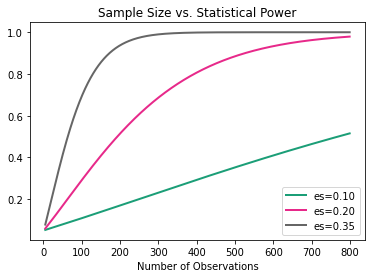

In [ ]:
power_analysis = TTestIndPower()
# Visualization
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 800),
                          effect_size=np.array([0.1, 0.2, 0.35]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()


###Obtaining Odds Ratio using Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
features = ["age", "Gender",	"bmi",	"edu",	"smear_culture",	"xpert",	"clin_tb",	"alcoholic",	"intervention"]

In [ ]:
x = df[["age", "Gender",	"bmi",	"edu",	"smear_culture",	"xpert",	"clin_tb",	"alcoholic",	"intervention"]].values
y = df["Treatment Outcomes After"].values
len(x)

1000

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, stratify=y)

In [ ]:
model = linear_model.LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.876

In [ ]:
confusion_matrix(y_test, y_predicted) #tn,fp
                                      #fn,tp

array([[  0,  62],
       [  0, 438]])

In [ ]:
precision_score(y_test, y_predicted)

0.876

In [ ]:
recall_score(y_test, y_predicted)

1.0

In [ ]:
f1_score(y_test, y_predicted)

0.933901918976546

In [ ]:
classification_report(y_test, y_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        62\n           1       0.88      1.00      0.93       438\n\n    accuracy                           0.88       500\n   macro avg       0.44      0.50      0.47       500\nweighted avg       0.77      0.88      0.82       500\n'

In [ ]:
import matplotlib.pyplot as plt

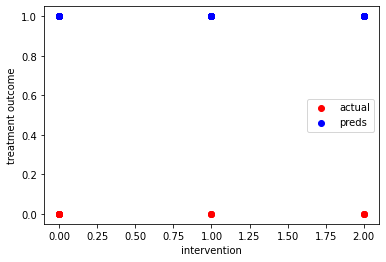

In [ ]:
plt.scatter(x_test[:100,8],y_test[:100],color = "red", label = "actual")
plt.scatter(x_test[:100,8],y_predicted[:100],color = "blue", label = "preds")
plt.xlabel(features[8])
plt.ylabel("treatment outcome")
plt.legend()

In [ ]:
'''
odds = p(event)/1-p(event)
for each feature x, odd = p(x)/1-p(x)
eg - odds ratio = odds of outcomes for females/odds of outcomes for males, odds of outcomes for intervention/odds of outcomes for no intervention, etc
'''
odds=np.exp(model.coef_) #model.coef_ gives an array of shape (1,n_features)
odds.shape

(1, 9)

In [ ]:
odds #the odds ratio obtained as a metric of univariate analysis

array([[0.98406304, 0.95190807, 0.84112458, 1.07926335, 1.30135823,
        0.90411611, 0.8255018 , 2.63089693, 0.25230079]])

In [ ]:
import statsmodels.api as sm
res = sm.Logit(y, x).fit()
np.exp(res.params)#the odds ratio obtained using inbuilt library

Optimization terminated successfully.
         Current function value: 0.384285
         Iterations 6


array([1.02677961, 1.42878762, 1.04087936, 1.32179448, 1.54852807,
       1.75608737, 1.06133388, 2.3181109 , 0.42616932])

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                -0.01995
Time:                        16:24:03   Log-Likelihood:                -384.28
converged:                       True   LL-Null:                       -376.77
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0264      0.006      4.704      0.000       0.015       0.037
x2             0.3568      0.184      1.938      0.053      -0.004       0.718
x3             0.0401      0.112      0.358      0.720      -0.179       0.260
x4             0.2790      0.185      1.506      0.132      -0.084       0.642
x5             0.4373      0.181      2.414      0.016       0.082       0.792
x6             0.5631      0.197      2.865      0.004       0.178       0.948
x7             0.0595      0.240      0.248      0.804      -0.410       0.529
x8             0.8408      0.466      1.802      0.071      -0.073       1.755
x9            -0.8529      0.271     -3.145      0.002      -1.384      -0.321
==============================================================================
"""

###Random Stuff

In [ ]:
from statsmodels.stats.power import TTestIndPower
effect=0.8
alpha=0.05
power=0.8
analysis=TTestIndPower()
result=analysis.solve_power(effect,power=power,nobs1=None,ratio=1.0,alpha=alpha)

ValueError: ignored

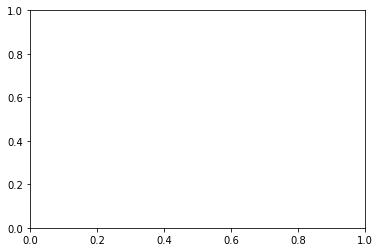

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(1, 1000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [ ]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.05 #the mini
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

In [ ]:
df.head()